In [13]:
import os
import glob
import subprocess
import pandas as pd

from subprocess import check_output

import pickle
from datetime import datetime
from time import time

import pdb

import datetime
import shutil
import sys
import glob
import os
from subprocess import check_output
import argparse

# Useful functions

In [6]:
def adillyofapickle(basepath,dic, name):
    datefmt = '%m-%d-%Y_%I-%M-%S'
    st = datetime.fromtimestamp(time()).strftime(datefmt)
    if os.path.exists(os.path.join(basepath,'tmp')):
        print('already have tmp')
    else:
        os.makedirs(os.path.join(basepath,'tmp'))
    pickle.dump(dic, open(os.path.join(basepath,'tmp','%s_%s'%(name,st)), 'wb'), protocol=4)


In [7]:
def onetoughjar(path2dic):
    with open(path2dic, 'rb') as pickle_file:
        try:
            while True:
                output = pickle.load(pickle_file)
        except EOFError:
            pass
    return(output)


## Paths

In [4]:
script_path = '/projects/niblab/scripts/BRO/'
fmriprep_path = '/projects/niblab/experiments/bromocriptine/fmriprep'
out_path = '/projects/niblab/data/BRO'
datadir = '/projects/niblab/experiments/bromocriptine/data/preprocessed/'


## Find which subjects have full data

In [4]:
cvs = {}
for dat in glob.glob(os.path.join(script_path,'renci_link','*.csv')):
    typ = dat.split('_')[-1].split('.')[0]
    print(typ)
    cvs[typ] = pd.read_csv(dat,names=['%s'%typ], dtype = 'object')
    

training2
PE1
PE2
anat
training1


In [22]:
df1 = pd.merge(cvs['training1'], cvs['training2'], left_on='training1', right_on='training2')
df2 = pd.merge(df1, cvs['PE1'], left_on='training1', right_on='PE1')
df3 = pd.merge(df2, cvs['PE2'], left_on='training1', right_on='PE2')
df = pd.merge(df3, cvs['anat'], left_on='training1', right_on='anat')

In [23]:
df['training1'].to_csv(os.path.join(out_path,'complete_subs.csv'), index=False, header = False)  

In [99]:
nifts = {'complete':[], 'missing':[]}
for x in glob.glob(os.path.join(datadir, 'sub-*','ses-*','func')):
    nifs = glob.glob(os.path.join(x,'niftis','sub-*_ses-*_task-*_run-*_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz'))
    moco = glob.glob(os.path.join(x,'motion_parameters','sub-*_ses-*_task-*_run-*_moco*.txt'))
    if len(nifs) > 0 and len(moco) > 0: 
        print(x)
        nifts['complete'].append(x)
    else:
        nifts['missing'].append(x)
    
    
    
    
    
    

/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-007/ses-1/func
/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-007/ses-2/func
/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-012/ses-1/func
/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-012/ses-2/func
/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-025/ses-1/func
/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-025/ses-2/func
/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-028/ses-1/func
/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-028/ses-2/func
/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-029/ses-1/func
/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-029/ses-2/func
/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-030/ses-1/func
/projects/niblab/experiments/bromocriptine/data/preprocessed/sub-030/ses-2/func
/projects/niblab/experiments/bromocripti

# Confounds 
Many subjects are missing their confounds. Need to make new ones

In [169]:
import numpy as np

In [196]:
fail_fd = {}
for tsv in glob.glob('/projects/niblab/experiments/bromocriptine/data/fmriprep/sub-*/ses-*/func/*.tsv'):
    sub = tsv.split('/')[-4]
    ses = tsv.split('/')[-3]
    task = tsv.split('/')[-1].split('_')[2]
    if task == 'task-resting':
        run = 'run-00'
    else:
        run = tsv.split('/')[-1].split('_')[3]
#     print(tsv)
    df = pd.read_csv(tsv, sep = '\t')
    x = df.columns.str.contains(r'motion_outlier')
    fd = df.iloc[:, x]
    if fd.shape[1] == 0:
        print('no fd')
        d = pd.DataFrame(np.zeros((243, 1)))
        d.write_csv(os.path.join(datadir,sub,ses,'func','confounds','%s_%s_%s_%s_space-MNI152NLin2009cAsym_desc-preproc_confound.txt'%(sub,ses,task,run)),
                         sep = ' ', index = False, header = False)
    else:
        fd2 = fd.sum(axis = 1)
        if fd2.sum(axis = 0) > 61:
            fail_fd[tsv] = fd2.sum(axis = 0)
        else:
            print(sub)
            print(run)
            df = pd.DataFrame(fd2)
            fd2.to_csv(os.path.join(datadir,sub,ses,'func','confounds','%s_%s_%s_%s_space-MNI152NLin2009cAsym_desc-preproc_confound.txt'%(sub,ses,task,run)),
                         sep = ' ', index = False, header = False)
            
            
            
            
            
            
            

sub-037
run-00
sub-037
run-1
sub-037
run-2
sub-020
run-00
sub-020
run-1
sub-035
run-2
sub-035
run-00
sub-001
run-2
sub-001
run-00
sub-001
run-1
sub-002
run-00
sub-002
run-2
sub-002
run-2
sub-002
run-1
sub-002
run-1
sub-027
run-00
sub-027
run-1
sub-027
run-2
sub-045
run-1
sub-045
run-2
sub-045
run-00
sub-045
run-1
sub-045
run-2
sub-045
run-2
sub-045
run-00
sub-045
run-1
sub-053
run-1
sub-053
run-00
sub-053
run-1
sub-053
run-00
sub-010
run-1
sub-010
run-1
sub-010
run-00
sub-010
run-1
sub-010
run-00
sub-010
run-2
sub-010
run-2
sub-010
run-1
sub-014
run-2
sub-014
run-2
sub-014
run-00
sub-014
run-1
sub-052
run-2
sub-052
run-1
sub-052
run-2
sub-052
run-00
sub-052
run-1
sub-052
run-00
sub-052
run-2
sub-052
run-1
sub-052
run-1
sub-052
run-2
sub-051
run-1
sub-051
run-1
sub-051
run-2
sub-051
run-00
sub-051
run-2
sub-051
run-2
sub-051
run-1
sub-051
run-00
sub-051
run-2
sub-051
run-1
sub-050
run-1
sub-050
run-00
sub-050
run-1
sub-050
run-2
sub-050
run-2
sub-050
run-1
sub-050
run-00
sub-050
run-1
s

AttributeError: 'DataFrame' object has no attribute 'write_csv'

# Level 1

## Need these paths
- output
- functional
- confound
- anat
- milkshake_cue_file
- milkshake_delivery_file
- h2O_cue_file
- h2O_delivery_file
- rinse_file
- moco0_file
- moco1_file
- moco2_file
- moco3_file
- moco4_file
- moco5_file


- sub-036_ses-2_task-training_run-1_h2O_cue.txt 
- sub-036_ses-2_task-training_run-1_h2O_delivery.txt 
- sub-036_ses-2_task-training_run-1_milkshake_cue.txt
- sub-036_ses-2_task-training_run-1_milkshake_delivery.txt
- sub-036_ses-2_task-training_run-1_rinse.txt  
#########
- sub-013_ses-2_task-pe_run-1_anticipation_milkshake.txt
- sub-013_ses-2_task-pe_run-1_matched_h2O.txt
- sub-013_ses-2_task-pe_run-1_matched_milkshake.txt
- sub-013_ses-2_task-pe_run-1_pe.txt
- sub-013_ses-2_task-pe_run-1_rinse.txt


In [22]:
subjects = pd.read_csv(os.path.join(script_path, 'complete.csv'), header = None)

In [29]:
onset_path = '/projects/niblab/experiments/bromocriptine/data/onsets/output_onsets'

In [75]:
onset_compl = {}
sess = ['1','2']
runs = ['1','2']
tasks = ['training','pe']
tastes_train = ['h2O_cue','milkshake_cue','h2O_delivery','milkshake_delivery','rinse']
tastes_pe = ['anticipation_milkshake','matched_h2O','matched_milkshake','pe','rinse']

for sub in list(subjects[0]):
    onset_compl[sub] = {}
    for ses in sess:
        onset_compl[sub]['ses-%s'%ses] = {}
        for run in runs:
#             print(run)
            onset_compl[sub]['ses-%s'%ses]['run-%s'%run] = {'training': {'exists': [], 'missing':[]}, 'pe': {'exists': [], 'missing':[]}}
            for task in tasks:
                if task == 'training':
                    for taste in tastes_train:
                        x = os.path.join(onset_path,'%s_ses-%s_task-%s_run-%s_%s.txt'%(sub,ses,task,run,taste))
                        if os.path.exists(x):
                            onset_compl[sub]['ses-%s'%ses]['run-%s'%run]['training']['exists'].append(x)
                        else:
                            y = 'missing %s_ses-%s_task-%s_run-%s_%s.txt'%(sub,ses,task,run,taste)
                            onset_compl[sub]['ses-%s'%ses]['run-%s'%run]['training']['missing'].append(y)
                else:
                    for taste in tastes_pe:
                        x = os.path.join(onset_path,'%s_ses-%s_task-%s_run-%s_%s.txt'%(sub,ses,task,run,taste))
                        if os.path.exists(x):
                            onset_compl[sub]['ses-%s'%ses]['run-%s'%run]['pe']['exists'].append(x)
                        else:
                            y = 'missing %s_ses-%s_task-%s_run-%s_%s.txt'%(sub,ses,task,run,taste)
                            onset_compl[sub]['ses-%s'%ses]['run-%s'%run]['pe']['missing'].append(y)
                        
                        
                        
                        
                        
                        
                        

## Notes
Number of volumns in untrimmed data is 243, the onsets should start at ~8 sec if using untrimmed data

In [213]:
def create_fsf(datadir, sub, ses, task, run):
    inputs = (sub,ses,task,run)
    outdir = '/projects/niblab/scripts/BRO/feat_fsf/level1/fsf_files'
    oot = '/projects/niblab/data/BRO/level1'
    #####################################
    error_file=os.path.join(outdir,'%s_ses-%s_task-%s_run-%s_error_file.txt'%inputs)
    error=open(error_file,'w')
    #####################################
    repl_dict = {}
    subpath = os.path.join(datadir,'%s'%sub,'ses-%s'%ses,'func','niftis')
    #####################################
    funcrun=os.path.join(subpath,'%s_ses-%s_task-%s_run-%s_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz'%inputs)
    repl_dict.update({'FUNCTIONAL':funcrun})
    #####################################
    confounds=os.path.join(datadir,'%s'%sub,'ses-%s'%ses,'func','confounds','%s_ses-%s_task-%s_run-%s_space-MNI152NLin2009cAsym_desc-preproc_confound.txt'%inputs)
    repl_dict.update({'CONFOUND':confounds})
    #####################################
#     anat=os.path.join(datadir,'%s'%sub,'anat','highres.nii.gz')
#     repl_dict.update({'ANAT':anat})
    #####################################
    ntmpts=check_output(['fslnvols',funcrun], universal_newlines=True)
    repl_dict.update({'VOL':ntmpts.strip()})
    #####################################
    output=os.path.join(oot,'%s_ses-%s_%s_run-%s.feat'%inputs)
    repl_dict.update({'OUTPUT':output})
    #####################################
    onsets=['h2O_cue', 'h2O_delivery', 'milkshake_cue', 'milkshake_delivery', 'rinse']
    repl = ['H2O_CUE','H2O_DELIVERY','MILKSHAKE_CUE','MILKSHAKE_DELIVERY','RINSE']
    for i,onset in enumerate(onsets):
#         print(onset)
        new_inputs = inputs+(onset,)
        value=os.path.join('/projects/niblab/experiments/bromocriptine/data/onsets/output_onsets/%s_ses-%s_task-%s_run-%s_%s.txt'%(new_inputs))
        repl_dict[repl[i]]=value
    #####################################
    mocos = ['moco0_file','moco1_file','moco2_file','moco3_file','moco4_file','moco5_file']
    for moco in mocos:
#         print(moco)
        m1 = moco.split('_')[0]
        new2_inputs = inputs+(m1,)
        v1=os.path.join('/projects/niblab/experiments/bromocriptine/data/preprocessed/%s/ses-%s/func/motion_parameters/'%(sub,ses))
        value = os.path.join(v1,'%s_ses-%s_task-%s_run-%s_%s.txt'%new2_inputs)
        repl_dict[moco]=value
    #####################################
    for key, value in repl_dict.items():
        if key in onsets:
            if os.path.exists(value)== False:
                error.write('%s is missing %s %s \n'%(sub,key,value))
        if key == 'OUTPUT':
            if os.path.exists(value)==True:
                time_inputs = inputs+(datestamp,)
                if os.path.exists(os.path.join(oot,'old'))== True:
                    shutil.move(value,os.path.join(oot,'old','%s_ses-%s_%s_run-%s_%s.feat')%(time_inputs))
                else:
                    os.makedirs(os.path.join(oot,'old'))
                    shutil.move(value,os.path.join(oot,'old','%s_ses-%s_%s_run-%s_%s.feat')%(time_inputs))
    #####################################
    subfile=os.path.join(outdir,'%s_ses-%s_task-%s_run-%s.fsf'%inputs)
    with open(os.path.join('/projects/niblab/scripts/BRO/feat_fsf/level1/templates','%s_design1_ges.fsf'%(task)),'r') as infile:
        tempfsf=infile.read()
        for key in repl_dict:
            tempfsf = tempfsf.replace(key, repl_dict[key])
            with open(subfile,'w') as outfile:
                outfile.write(tempfsf)
    name = '%s_ses-%s_%s_run-%s'%inputs
    adillyofapickle(outdir,repl_dict, name)
    error.close()

    

In [214]:
for x in nifts['complete']:
#     print(x)
    sub = x.split('/')[-3]
    ses = x.split('/')[-2]
    try:
        for run, df in onset_compl[sub][ses].items():
            for task, stuff in df.items():
                    if task == 'training':
                        test = '/projects/niblab/experiments/bromocriptine/data/fmriprep/%s/%s/func/%s_%s_task-%s_%s_desc-confounds_regressors.tsv'%(sub, ses, sub,ses, task, run)
                        if test in list(fail_fd.keys()):
                            print('no fd')
                        else:
                            if len(df['training']['exists']) == 5:
                                print(sub)
                                print(ses)
                                print(run)
                                print(task)
                                create_fsf(datadir, '%s'%sub, '%s'%(ses.split('-')[1]), '%s'%task, '%s'%(run.split('-')[1]))
    except KeyError:
        continue

                            

sub-025
ses-1
run-1
training
already have tmp
sub-025
ses-1
run-2
training
already have tmp
sub-025
ses-2
run-1
training
already have tmp
sub-025
ses-2
run-2
training
already have tmp
sub-028
ses-1
run-1
training
already have tmp
sub-028
ses-1
run-2
training
already have tmp
sub-028
ses-2
run-1
training
already have tmp
sub-028
ses-2
run-2
training
already have tmp
sub-029
ses-1
run-1
training
already have tmp
sub-029
ses-1
run-2
training
already have tmp
sub-029
ses-2
run-1
training
already have tmp
sub-029
ses-2
run-2
training
already have tmp
sub-030
ses-1
run-1
training
already have tmp
sub-030
ses-1
run-2
training
already have tmp
sub-030
ses-2
run-1
training
already have tmp
sub-030
ses-2
run-2
training
already have tmp
sub-032
ses-1
run-1
training
already have tmp
sub-032
ses-1
run-2
training
already have tmp
sub-032
ses-2
run-1
training
already have tmp
sub-032
ses-2
run-2
training
already have tmp
no fd
no fd
sub-033
ses-2
run-1
training
already have tmp
sub-033
ses-2
run-2
tr

In [223]:
x = glob.glob(os.path.join('/projects/niblab/scripts/BRO/feat_fsf/level1/fsf_files', 'sub-*_ses-1_task-training_run-1.fsf'))
z = []
for y in x:
    print(y.split('/')[-1].split('_')[0].split('-')[1])





025
028
029
030
032
036
039
040
041
044
047
053
022
026
043


## Registration
https://mumfordbrainstats.tumblr.com/post/166054797696/feat-registration-workaround

# Visualization

In [110]:
import nibabel as nib

In [112]:
f = os.path.join(datadir,'sub-003','anat','highres.nii.gz')
img = nib.load(f)

In [126]:
g = '/projects/niblab/experiments/bromocriptine/data/bids/bids/sub-001/ses-2/anat/sub-001_ses-2_T1w.nii.gz'
img2 = nib.load(g)

In [119]:
import matplotlib

In [124]:
from nilearn.plotting import view_img_on_surf, view_img
from nilearn import plotting


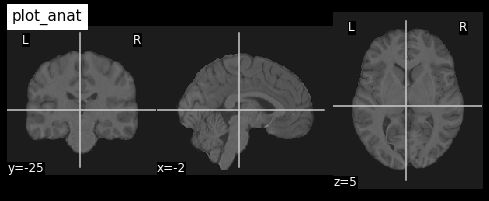

In [128]:
plotting.plot_anat(img, title="plot_anat")

/home/gshearre/miniconda3/lib/python3.7/site-packages/nilearn/image/resampling.py:531: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


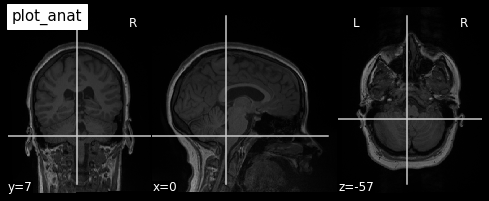

In [129]:
plotting.plot_anat(img2, title="plot_anat")

# Notes
Need to look back into the skipping the registration in FSL (Jeannette)